In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [1]:
pip install kaggle


In [3]:
!kaggle datasets download -d hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection
!unzip vehide-dataset-automatic-vehicle-damage-detection.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open vehide-dataset-automatic-vehicle-damage-detection.zip, vehide-dataset-automatic-vehicle-damage-detection.zip.zip or vehide-dataset-automatic-vehicle-damage-detection.zip.ZIP.


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hellisrightinmyeyes","key":"d5dbcd9dc95b54a8b4c1a3054699735b"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection


Dataset URL: https://www.kaggle.com/datasets/hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection
License(s): apache-2.0
 97% 2.04G/2.10G [00:26<00:01, 43.5MB/s]
100% 2.10G/2.10G [00:26<00:00, 84.8MB/s]


In [7]:
!unzip vehide-dataset-automatic-vehicle-damage-detection.zip


Streaming output truncated to the last 5000 lines.
  inflating: image/image/22102020_091634image60207.jpg  
  inflating: image/image/22102020_091653image57537.jpg  
  inflating: image/image/22102020_091656image985485.jpg  
  inflating: image/image/22102020_092538image234088.jpg  
  inflating: image/image/22102020_092538image907615.jpg  
  inflating: image/image/22102020_092550image230529.jpg  
  inflating: image/image/22102020_095630image160624.jpg  
  inflating: image/image/22102020_095647image656381.jpg  
  inflating: image/image/22102020_095647image820454.jpg  
  inflating: image/image/22102020_095712image495296.jpg  
  inflating: image/image/22102020_095717image839663.jpg  
  inflating: image/image/22102020_095816image850173.jpg  
  inflating: image/image/22102020_100140image618831.jpg  
  inflating: image/image/22102020_102401image261580.jpg  
  inflating: image/image/22102020_102410image986649.jpg  
  inflating: image/image/22102020_102413image593513.jpg  
  inflating: image/imag

In [10]:
import os
os.listdir()


['.config',
 '0Val_via_annos.json',
 'kaggle (1).json',
 'image',
 '0Train_via_annos.json',
 'vehide-dataset-automatic-vehicle-damage-detection.zip',
 'validation',
 'sample_data']

In [12]:
import os
os.listdir("image")


['image']

In [13]:
IMG_DIR = "image/image"


In [15]:
IMG_SIZE = 128
IMG_DIR = "image/image"

X = []
count = 0

for file in os.listdir(IMG_DIR):
    if file.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(IMG_DIR, file)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0   # normalize

        X.append(img)
        count += 1

        if count == 600:
            break

X = np.array(X)
y = np.zeros(len(X))   # dummy labels

print("Loaded images:", X.shape)


Loaded images: (600, 128, 128, 3)


In [21]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(128, 128, 3))

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Flatten()(x)
embedding = tf.keras.layers.Dense(128, activation='relu', name="embedding_layer")(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(embedding)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X, y,
    epochs=5,
    batch_size=32
)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 855ms/step - accuracy: 1.0000 - loss: 0.0965
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 861ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 797ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 854ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [23]:
embedding_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer("embedding_layer").output
)

embeddings = embedding_model.predict(X)
print("Embedding shape:", embeddings.shape)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step
Embedding shape: (600, 128)


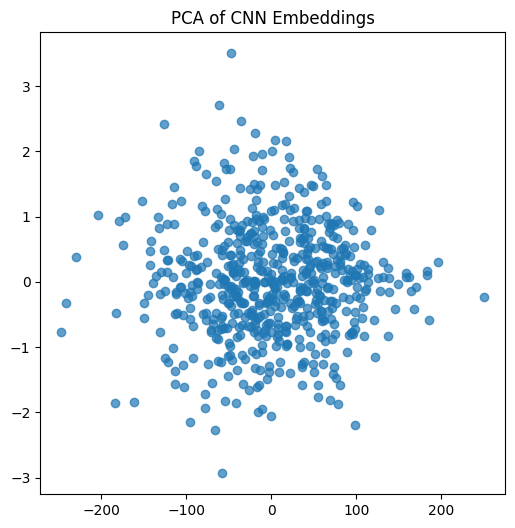

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(6,6))
plt.scatter(emb_pca[:,0], emb_pca[:,1], alpha=0.7)
plt.title("PCA of CNN Embeddings")
plt.show()


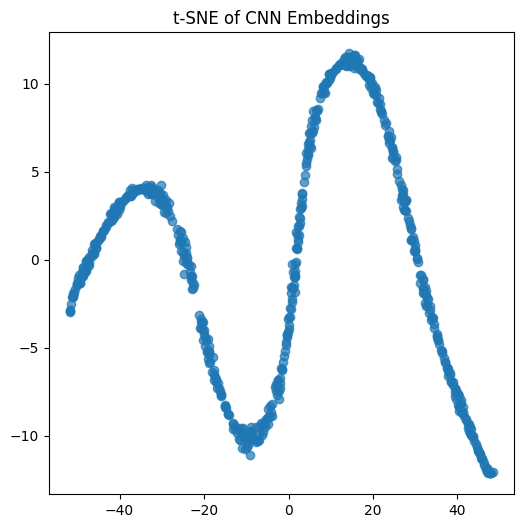

In [25]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emb_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(6,6))
plt.scatter(emb_tsne[:,0], emb_tsne[:,1], alpha=0.7)
plt.title("t-SNE of CNN Embeddings")
plt.show()


How do CNN embeddings differ from HOG features?
HOG (Histogram of Oriented Gradients) features are hand-crafted descriptors that capture local edge orientations and gradient information using predefined rules. They are fixed and limited to low-level visual cues such as edges and corners.
In contrast, CNN embeddings are learned automatically from data. They form hierarchical representations: early layers capture edges and textures, while deeper layers encode complex patterns and semantic information such as dents, cracks, and surface irregularities. CNN embeddings are therefore more expressive and adaptable than HOG features.

Why do CNN features work better for damage detection?
Vehicle damage involves complex visual patterns that vary with lighting, viewpoint, and background. CNNs learn damage-specific features directly from images, making them robust to such variations. They can capture subtle texture changes, deformations, and contextual information that HOG features often miss. As a result, CNN embeddings provide better discrimination between damaged and undamaged regions, leading to superior performance in damage detection tasks.